In [1]:
import pickle as pk
import streamlit as st
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import stats
from sklearn.model_selection import *
from sklearn.linear_model import *
from sklearn.metrics import *
from sklearn.preprocessing import *
from sklearn.neighbors import *
from sklearn.tree import *
from sklearn.ensemble import *
from imblearn.over_sampling import *
%matplotlib inline



import statsmodels.api as sapi

import warnings
warnings.filterwarnings("ignore")


In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/jbrownlee/Datasets/master/oil-spill.csv",header=None)

In [3]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,1,2558,1506.09,456.63,90,6395000.0,40.88,7.89,29780.0,0.19,...,2850.00,1000.00,763.16,135.46,3.73,0,33243.19,65.74,7.95,1
1,2,22325,79.11,841.03,180,55812500.0,51.11,1.21,61900.0,0.02,...,5750.00,11500.00,9593.48,1648.80,0.60,0,51572.04,65.73,6.26,0
2,3,115,1449.85,608.43,88,287500.0,40.42,7.34,3340.0,0.18,...,1400.00,250.00,150.00,45.13,9.33,1,31692.84,65.81,7.84,1
3,4,1201,1562.53,295.65,66,3002500.0,42.40,7.97,18030.0,0.19,...,6041.52,761.58,453.21,144.97,13.33,1,37696.21,65.67,8.07,1
4,5,312,950.27,440.86,37,780000.0,41.43,7.03,3350.0,0.17,...,1320.04,710.63,512.54,109.16,2.58,0,29038.17,65.66,7.35,0


In [4]:
column_names = ['col_' + str(i) for i in range(df.shape[1])]  # Example: col_0, col_1, ...
df.columns = column_names

In [5]:
df.head()

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,...,col_40,col_41,col_42,col_43,col_44,col_45,col_46,col_47,col_48,col_49
0,1,2558,1506.09,456.63,90,6395000.0,40.88,7.89,29780.0,0.19,...,2850.00,1000.00,763.16,135.46,3.73,0,33243.19,65.74,7.95,1
1,2,22325,79.11,841.03,180,55812500.0,51.11,1.21,61900.0,0.02,...,5750.00,11500.00,9593.48,1648.80,0.60,0,51572.04,65.73,6.26,0
2,3,115,1449.85,608.43,88,287500.0,40.42,7.34,3340.0,0.18,...,1400.00,250.00,150.00,45.13,9.33,1,31692.84,65.81,7.84,1
3,4,1201,1562.53,295.65,66,3002500.0,42.40,7.97,18030.0,0.19,...,6041.52,761.58,453.21,144.97,13.33,1,37696.21,65.67,8.07,1
4,5,312,950.27,440.86,37,780000.0,41.43,7.03,3350.0,0.17,...,1320.04,710.63,512.54,109.16,2.58,0,29038.17,65.66,7.35,0


In [6]:
df["Target"]=df["col_49"]
df.drop("col_49",axis=1,inplace=True)
df.head()

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,...,col_40,col_41,col_42,col_43,col_44,col_45,col_46,col_47,col_48,Target
0,1,2558,1506.09,456.63,90,6395000.0,40.88,7.89,29780.0,0.19,...,2850.00,1000.00,763.16,135.46,3.73,0,33243.19,65.74,7.95,1
1,2,22325,79.11,841.03,180,55812500.0,51.11,1.21,61900.0,0.02,...,5750.00,11500.00,9593.48,1648.80,0.60,0,51572.04,65.73,6.26,0
2,3,115,1449.85,608.43,88,287500.0,40.42,7.34,3340.0,0.18,...,1400.00,250.00,150.00,45.13,9.33,1,31692.84,65.81,7.84,1
3,4,1201,1562.53,295.65,66,3002500.0,42.40,7.97,18030.0,0.19,...,6041.52,761.58,453.21,144.97,13.33,1,37696.21,65.67,8.07,1
4,5,312,950.27,440.86,37,780000.0,41.43,7.03,3350.0,0.17,...,1320.04,710.63,512.54,109.16,2.58,0,29038.17,65.66,7.35,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 937 entries, 0 to 936
Data columns (total 50 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   col_0   937 non-null    int64  
 1   col_1   937 non-null    int64  
 2   col_2   937 non-null    float64
 3   col_3   937 non-null    float64
 4   col_4   937 non-null    int64  
 5   col_5   937 non-null    float64
 6   col_6   937 non-null    float64
 7   col_7   937 non-null    float64
 8   col_8   937 non-null    float64
 9   col_9   937 non-null    float64
 10  col_10  937 non-null    float64
 11  col_11  937 non-null    float64
 12  col_12  937 non-null    float64
 13  col_13  937 non-null    float64
 14  col_14  937 non-null    float64
 15  col_15  937 non-null    float64
 16  col_16  937 non-null    float64
 17  col_17  937 non-null    float64
 18  col_18  937 non-null    float64
 19  col_19  937 non-null    float64
 20  col_20  937 non-null    float64
 21  col_21  937 non-null    float64
 22  co

In [8]:
df.describe(include="all").round(2)

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,...,col_40,col_41,col_42,col_43,col_44,col_45,col_46,col_47,col_48,Target
count,937.00,937.00,937.00,937.00,937.00,937.00,937.00,937.00,937.00,937.00,...,937.00,937.00,937.00,937.00,937.00,937.00,937.00,937.00,937.00,937.00
mean,81.59,332.84,698.71,870.99,84.12,769696.38,43.24,9.13,3940.71,0.22,...,933.93,427.57,255.44,106.11,5.01,0.13,7985.72,61.69,8.12,0.04
std,64.98,1931.94,599.97,522.80,45.36,3831151.03,12.72,3.59,8167.43,0.09,...,1001.68,715.39,534.31,135.62,5.03,0.33,6854.50,10.41,2.91,0.20
min,1.00,10.00,1.92,1.00,0.00,70312.00,21.24,0.83,667.00,0.02,...,0.00,0.00,0.00,0.00,0.00,0.00,2051.50,35.95,5.81,0.00
25%,31.00,20.00,85.27,444.20,54.00,125000.00,33.65,6.75,1371.00,0.16,...,450.00,180.00,90.80,50.12,2.37,0.00,3760.57,65.72,6.34,0.00
50%,64.00,65.00,704.37,761.28,73.00,186300.00,39.97,8.20,2090.00,0.20,...,685.42,270.00,161.65,73.85,3.85,0.00,5509.43,65.93,7.22,0.00
75%,124.00,132.00,1223.48,1260.37,117.00,330468.00,52.42,10.76,3435.00,0.26,...,1053.42,460.98,265.51,125.81,6.32,0.00,9521.93,66.13,7.84,0.00
max,352.00,32389.00,1893.08,2724.57,180.00,71315000.00,82.64,24.69,160740.00,0.74,...,11949.33,11500.00,9593.48,1748.13,76.63,1.00,55128.46,66.45,15.44,1.00


In [9]:
df.isna().sum()

col_0     0
col_1     0
col_2     0
col_3     0
col_4     0
col_5     0
col_6     0
col_7     0
col_8     0
col_9     0
col_10    0
col_11    0
col_12    0
col_13    0
col_14    0
col_15    0
col_16    0
col_17    0
col_18    0
col_19    0
col_20    0
col_21    0
col_22    0
col_23    0
col_24    0
col_25    0
col_26    0
col_27    0
col_28    0
col_29    0
col_30    0
col_31    0
col_32    0
col_33    0
col_34    0
col_35    0
col_36    0
col_37    0
col_38    0
col_39    0
col_40    0
col_41    0
col_42    0
col_43    0
col_44    0
col_45    0
col_46    0
col_47    0
col_48    0
Target    0
dtype: int64

In [10]:
df.shape

(937, 50)

In [11]:
df.dtypes.value_counts()

float64    40
int64      10
Name: count, dtype: int64

In [12]:
df.duplicated().sum()

0

In [13]:
df.nunique().sort_values(ascending=False)

col_46    937
col_3     933
col_2     927
col_16    893
col_6     820
col_17    810
col_37    758
col_43    649
col_42    644
col_7     618
col_10    577
col_8     561
col_44    499
col_28    447
col_29    392
col_40    388
col_5     375
col_27    308
col_1     297
col_48    286
col_0     238
col_41    220
col_4     179
col_18    170
col_47    169
col_34    141
col_35    110
col_13    107
col_30    107
col_23     92
col_15     91
col_12     73
col_20     68
col_11     59
col_9      57
col_14     53
col_19     53
col_33     45
col_31     42
col_26      9
col_21      9
col_38      9
col_39      9
col_24      9
col_25      8
col_32      4
col_36      3
col_45      2
Target      2
col_22      1
dtype: int64

In [14]:
df["Target"].unique()

array([1, 0], dtype=int64)

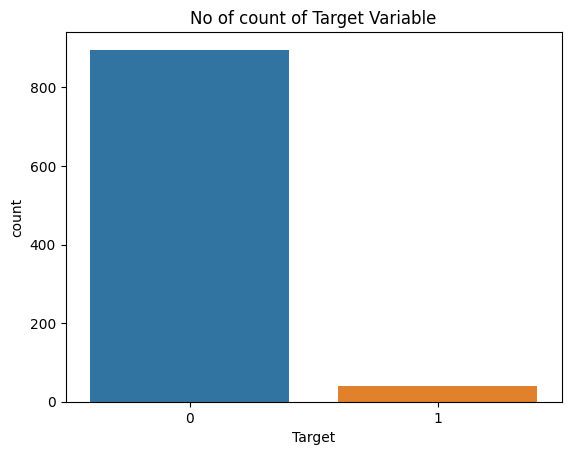

In [15]:
sns.countplot(x=df["Target"])
plt.title("No of count of Target Variable")
plt.show()

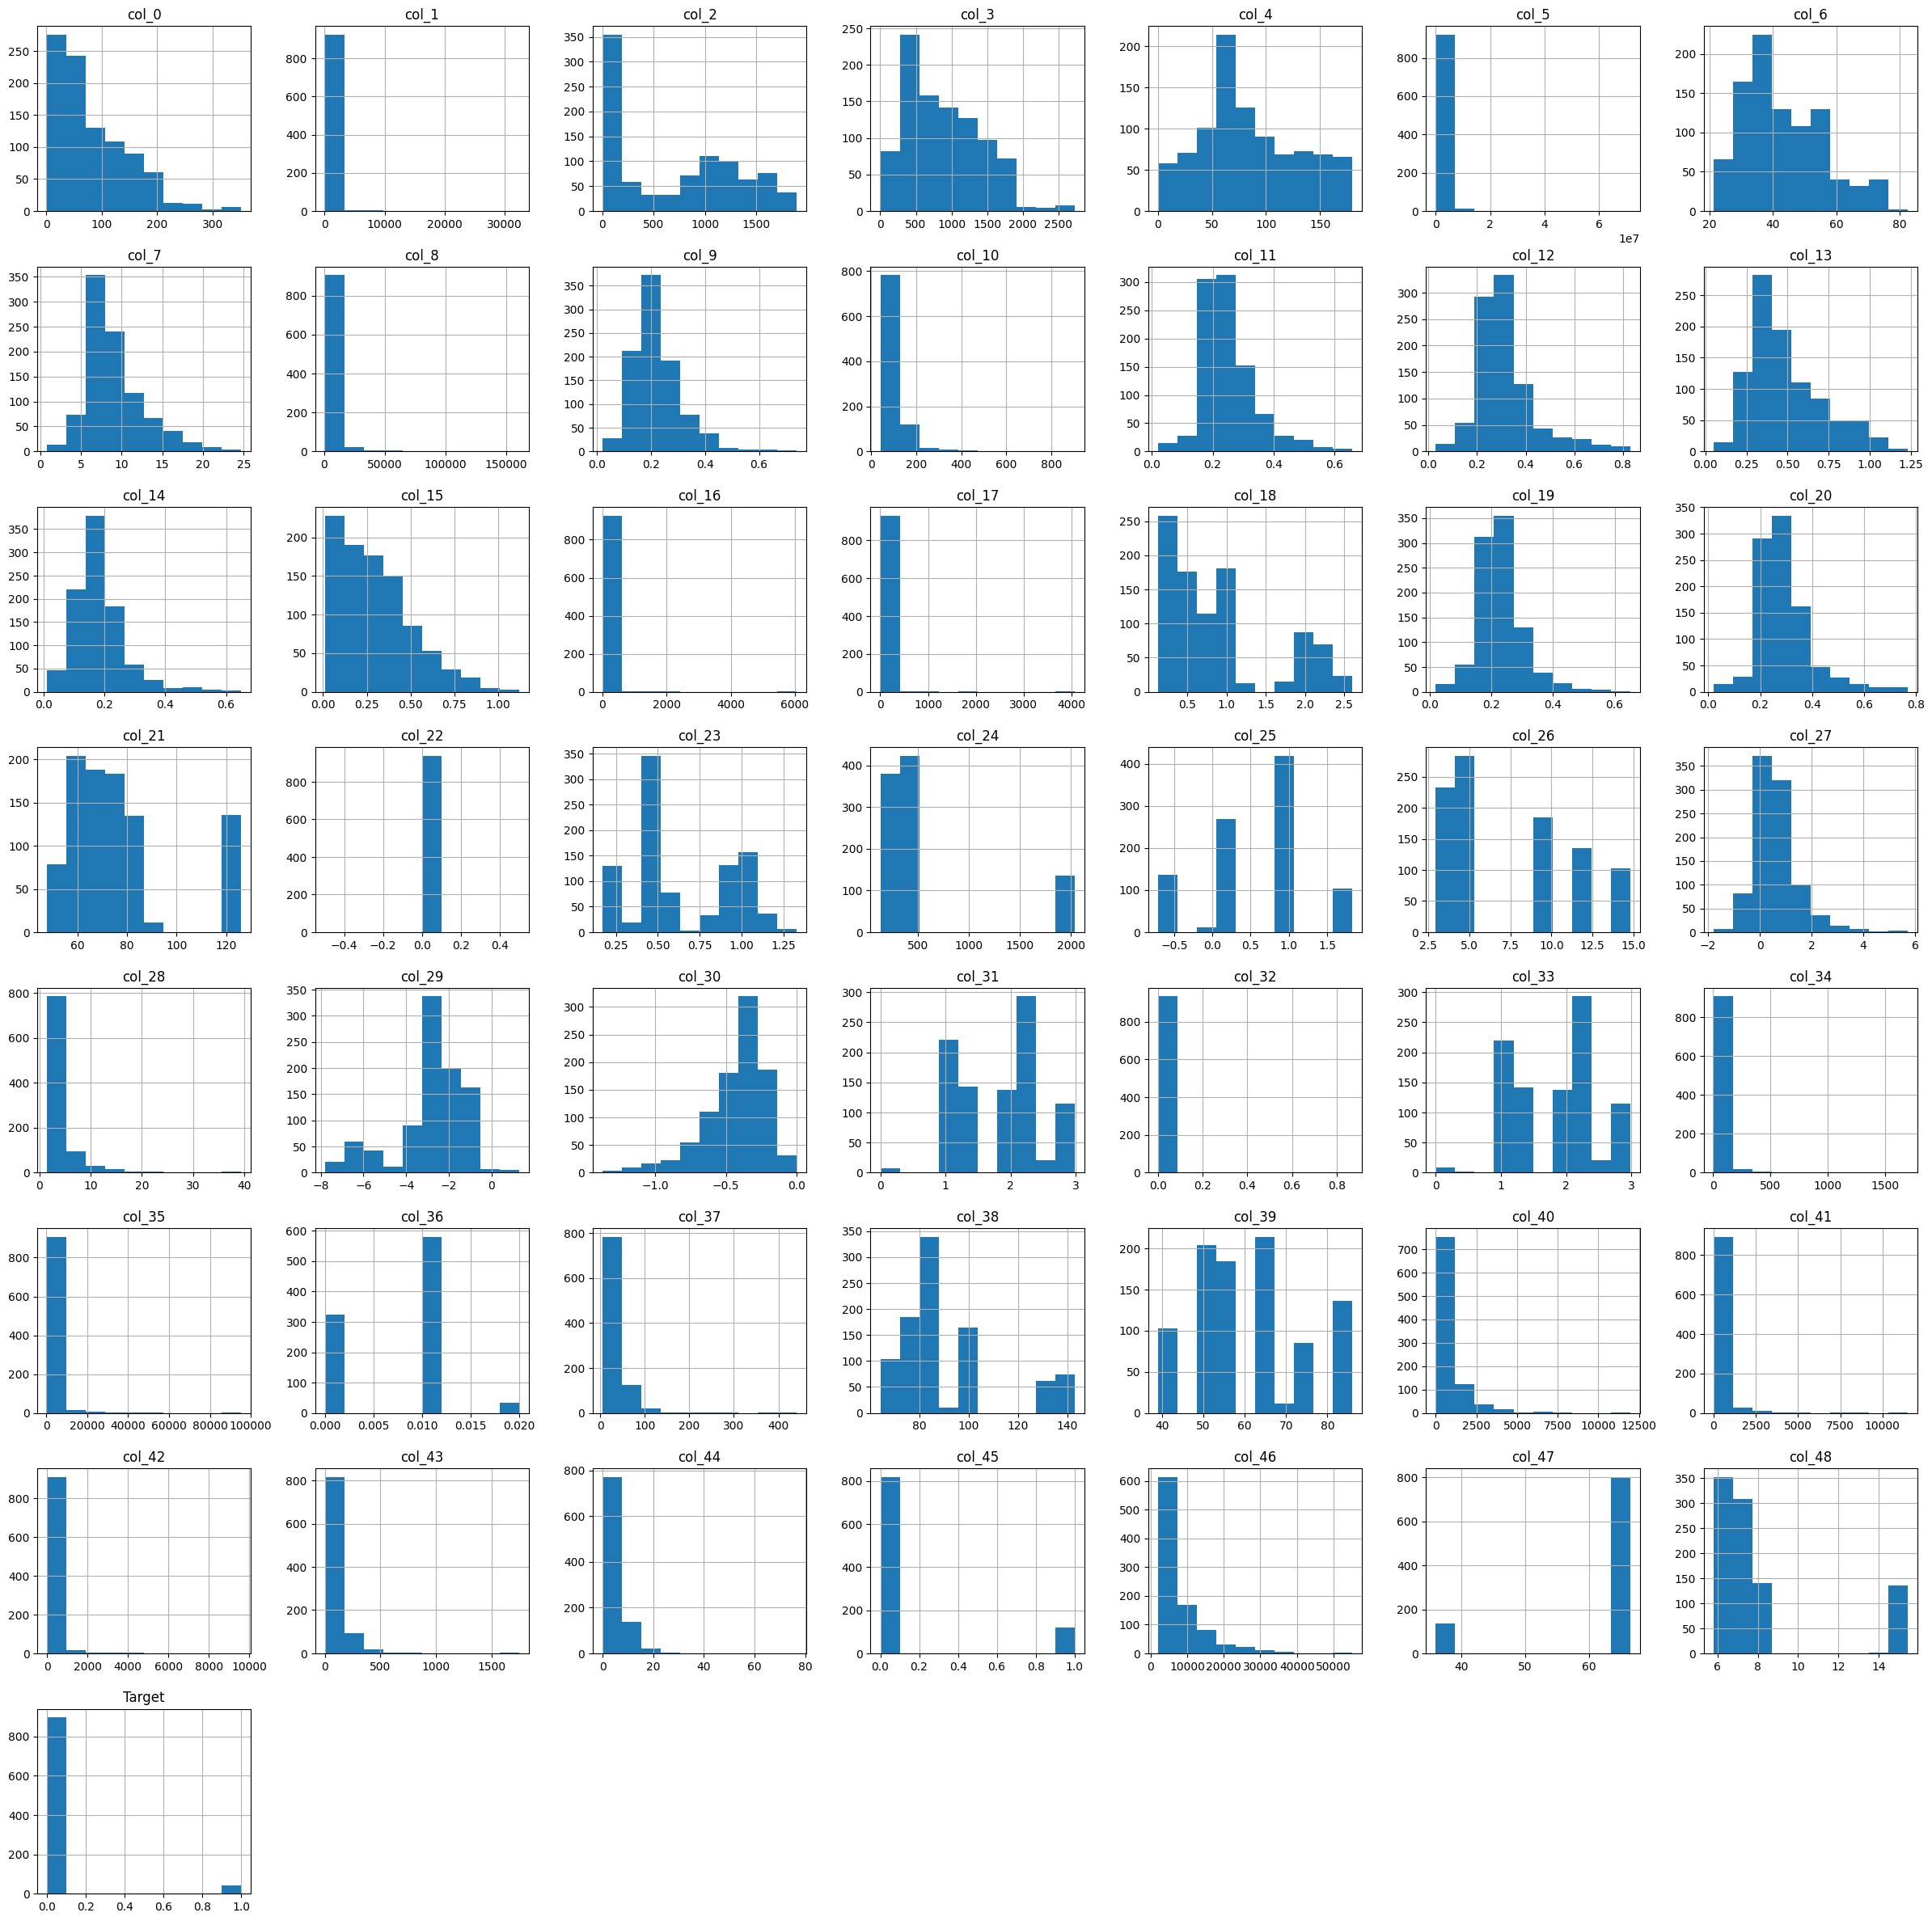

In [16]:
df.hist(figsize=(30,30))
plt.show()

In [17]:
col=list(df.shape)
col=col[-1]

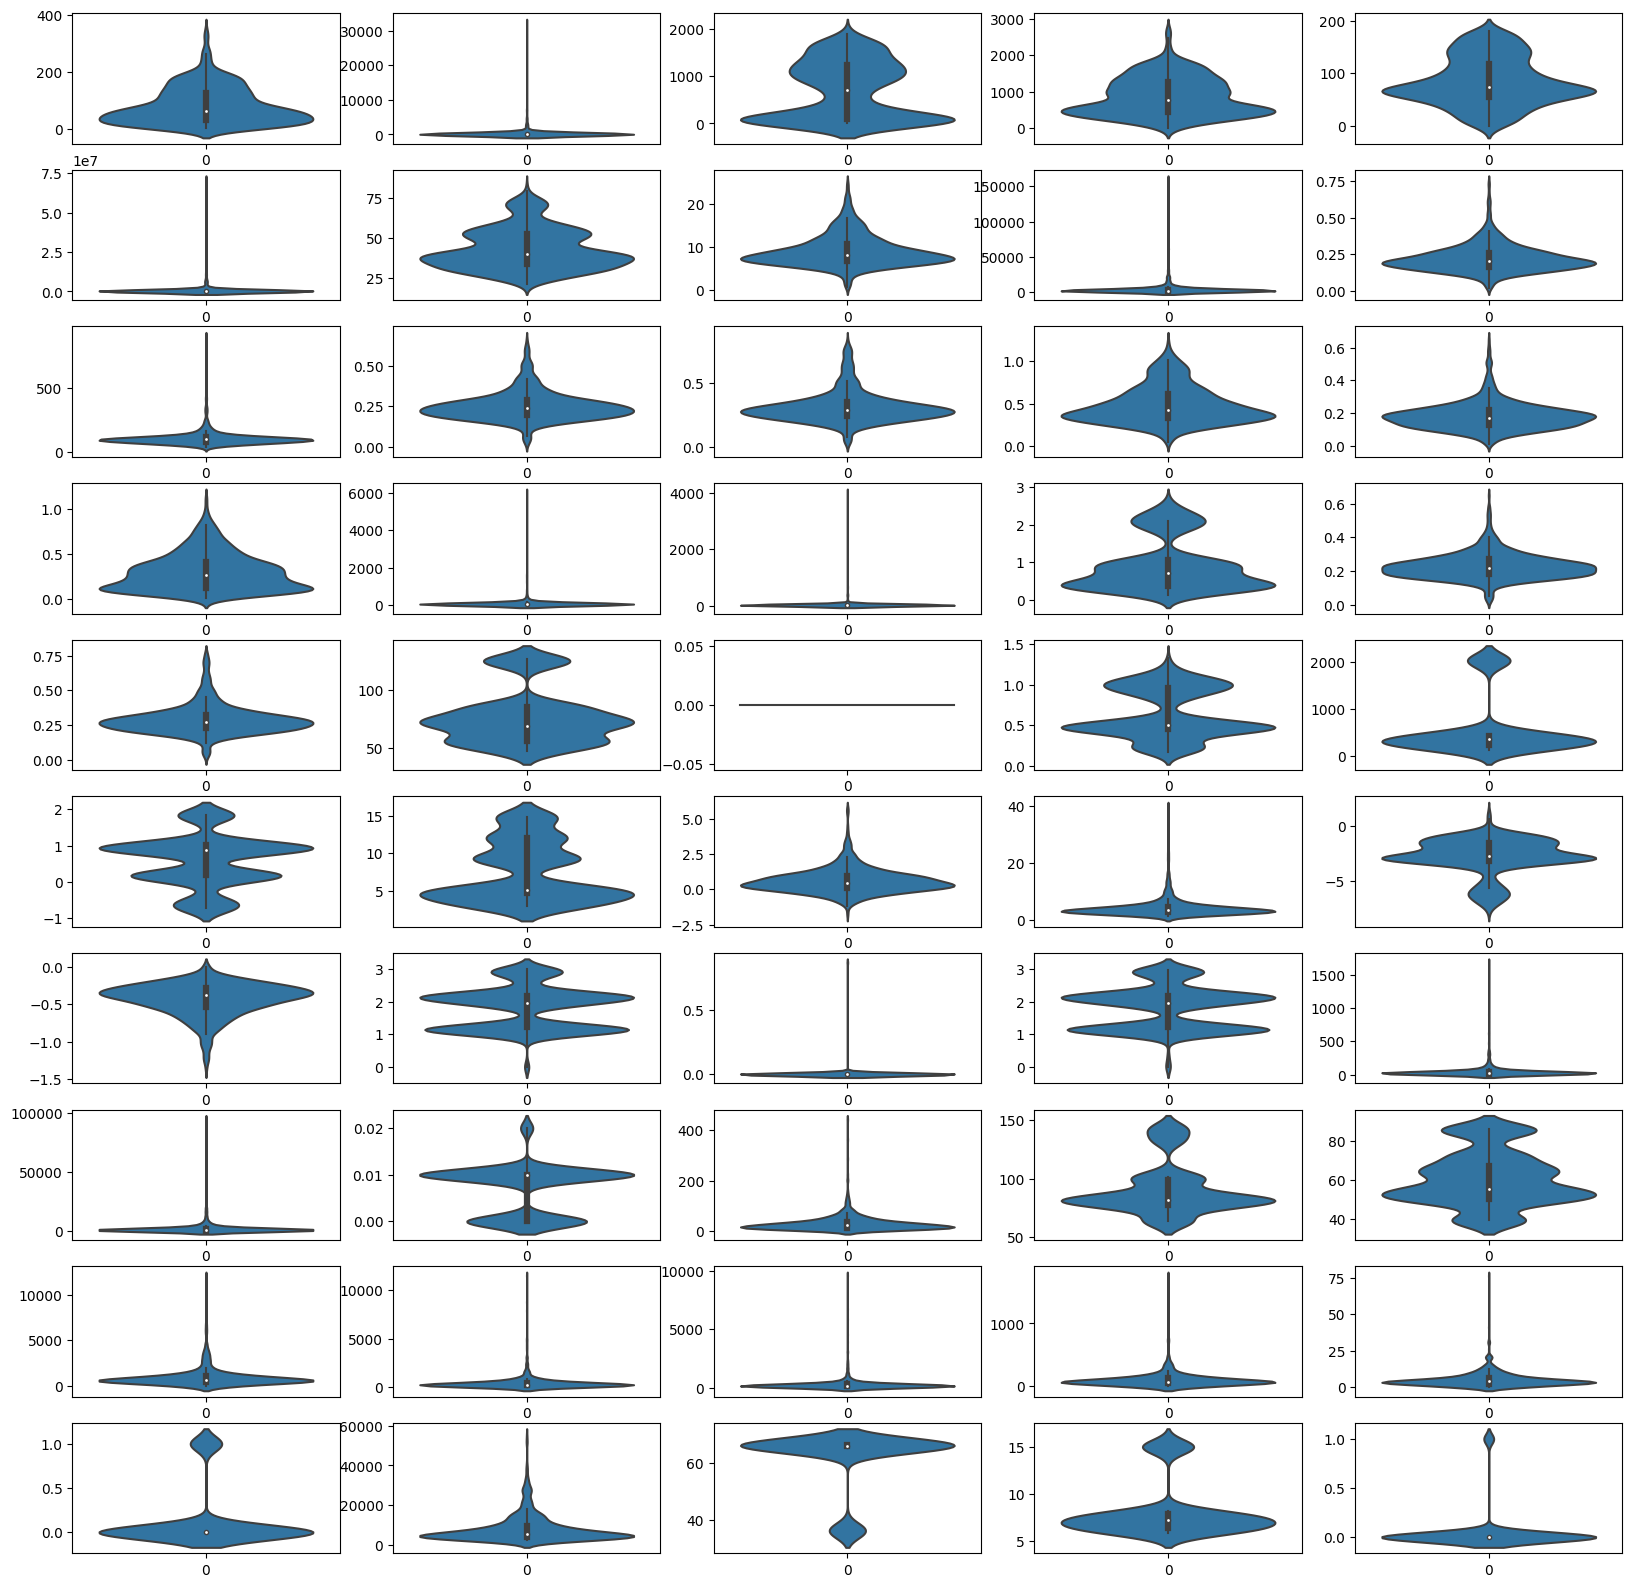

In [18]:
plt.figure(figsize=(20,20))
for i in range(col):
    plt.subplot(10,5,i+1)
    sns.violinplot(df.iloc[:,i])
plt.show()

In [19]:
df.corr()


,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,...,col_40,col_41,col_42,col_43,col_44,col_45,col_46,col_47,col_48,Target
col_0,1.000000,-0.155581,0.172017,-0.104116,-0.017025,-0.169533,-0.037412,-0.204983,-0.244551,-0.214447,...,-0.286190,-0.167466,-0.156916,-0.141792,-0.139478,-0.163693,-0.202983,0.294422,-0.253698,-0.180531
col_1,-0.155581,1.000000,0.058390,0.052638,-0.036870,0.953947,-0.136761,-0.016822,0.829978,0.128465,...,0.555154,0.777807,0.800939,0.716496,-0.080879,-0.048315,0.118792,-0.128222,0.139417,0.034128
col_2,0.172017,0.058390,1.000000,0.549510,-0.082764,0.050795,-0.627934,-0.349541,0.158686,0.073794,...,0.186920,0.178287,0.129653,0.176883,-0.088310,-0.182458,-0.022098,0.048291,0.162600,-0.035221
col_3,-0.104116,0.052638,0.549510,1.000000,0.048847,0.024693,-0.546205,-0.222063,0.097683,0.202167,...,-0.046934,0.032402,0.022234,0.000664,-0.220461,-0.204776,0.106758,-0.394081,0.476127,-0.050489
col_4,-0.017025,-0.036870,-0.082764,0.048847,1.000000,-0.028431,0.059128,0.123814,-0.047879,0.098573,...,-0.066930,-0.014877,-0.013742,-0.012346,-0.076695,-0.080136,0.070070,-0.135294,0.116896,-0.078598
col_5,-0.169533,0.953947,0.050795,0.024693,-0.028431,1.000000,-0.093589,-0.001395,0.894150,0.097449,...,0.594273,0.844597,0.868353,0.770044,-0.077783,-0.046834,0.126850,-0.058752,0.069731,0.049318
col_6,-0.037412,-0.136761,-0.627934,-0.546205,0.059128,-0.093589,1.000000,0.381206,-0.188076,-0.380340,...,-0.115014,-0.100003,-0.074308,-0.073751,0.077207,0.088633,-0.157243,0.483034,-0.612819,-0.026183
col_7,-0.204983,-0.016822,-0.349541,-0.222063,0.123814,-0.001395,0.381206,1.000000,0.001073,0.670628,...,0.013476,-0.015712,-0.013193,0.002439,-0.061639,-0.051879,-0.028117,-0.101155,0.033731,-0.014434
col_8,-0.244551,0.829978,0.158686,0.097683,-0.047879,0.894150,-0.188076,0.001073,1.000000,0.164098,...,0.675610,0.784833,0.770129,0.736075,-0.073312,-0.048994,0.102540,-0.080203,0.113389,0.076679
col_9,-0.214447,0.128465,0.073794,0.202167,0.098573,0.097449,-0.380340,0.670628,0.164098,1.000000,...,0.082449,0.052518,0.043116,0.042269,-0.113481,-0.095896,0.112275,-0.587156,0.603358,-0.013359


<Axes: >

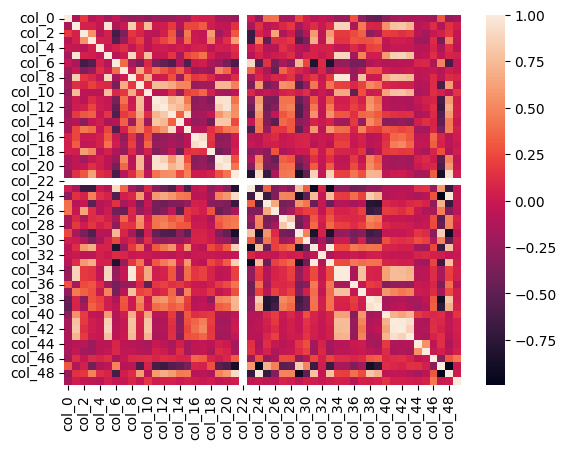

In [20]:
sns.heatmap(df.corr())

<Axes: >

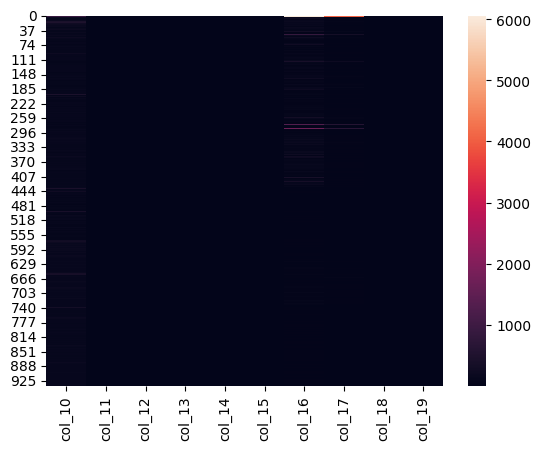

In [21]:
sns.heatmap(data=df.iloc[:,10:20])

In [22]:
df.columns

Index(['col_0', 'col_1', 'col_2', 'col_3', 'col_4', 'col_5', 'col_6', 'col_7',
       'col_8', 'col_9', 'col_10', 'col_11', 'col_12', 'col_13', 'col_14',
       'col_15', 'col_16', 'col_17', 'col_18', 'col_19', 'col_20', 'col_21',
       'col_22', 'col_23', 'col_24', 'col_25', 'col_26', 'col_27', 'col_28',
       'col_29', 'col_30', 'col_31', 'col_32', 'col_33', 'col_34', 'col_35',
       'col_36', 'col_37', 'col_38', 'col_39', 'col_40', 'col_41', 'col_42',
       'col_43', 'col_44', 'col_45', 'col_46', 'col_47', 'col_48', 'Target'],
      dtype='object')

In [23]:
df.drop(["col_0","col_22"],axis=1,inplace=True)
#because as per the machine learning mastery column 22 contains single value and also column 0 image patch number 
# these does not really helpful for the model prediction

In [24]:
df.columns

Index(['col_1', 'col_2', 'col_3', 'col_4', 'col_5', 'col_6', 'col_7', 'col_8',
       'col_9', 'col_10', 'col_11', 'col_12', 'col_13', 'col_14', 'col_15',
       'col_16', 'col_17', 'col_18', 'col_19', 'col_20', 'col_21', 'col_23',
       'col_24', 'col_25', 'col_26', 'col_27', 'col_28', 'col_29', 'col_30',
       'col_31', 'col_32', 'col_33', 'col_34', 'col_35', 'col_36', 'col_37',
       'col_38', 'col_39', 'col_40', 'col_41', 'col_42', 'col_43', 'col_44',
       'col_45', 'col_46', 'col_47', 'col_48', 'Target'],
      dtype='object')

In [25]:
"""
As we can apply multiple binary class classification algorithems to determine the classification of the alforithems 

    """
X=df.iloc[:,:-1]
y=df.iloc[:,-1]


In [26]:
#from sklearn.preprocessing import StandardScaler
sc=StandardScaler()


In [27]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,random_state=0)

In [28]:
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [29]:
X_train

array([[-0.11164111,  0.12590979,  1.48716661, ...,  0.58650608,
         0.44149799, -0.4753498 ],
       [-0.13694864,  1.41493689,  1.00473289, ..., -0.4269569 ,
         0.43959392, -0.12734612],
       [-0.12357862,  0.32638997,  0.59527154, ...,  0.67620532,
         0.42150528, -0.36617217],
       ...,
       [-0.16082367, -1.118125  , -0.44385792, ..., -0.34814092,
         0.43673782, -0.77217647],
       [-0.07296356, -0.78698426,  1.31102046, ...,  0.00428934,
        -2.42221932,  2.28820886],
       [-0.15127366, -1.12379228, -0.492288  , ..., -0.61935181,
         0.43292968, -0.76535287]])

In [30]:
#from sklearn.linear_model import LogisticRegression
lr1=LogisticRegression(penalty='l2',solver="liblinear")
lr2=LogisticRegression(penalty="l2",solver="newton-cg")
lr3=LogisticRegression(penalty="l2",solver="newton-cholesky")
lr4=LogisticRegression(penalty="elasticnet",solver="saga",l1_ratio=0.5)


In [31]:
lr1.fit(X_train,y_train)
lr2.fit(X_train,y_train)
lr3.fit(X_train,y_train)
lr4.fit(X_train,y_train)

LogisticRegression(l1_ratio=0.5, penalty='elasticnet', solver='saga')

In [32]:
lr1_y_pred=lr1.predict(X_test)
lr2_y_pred=lr2.predict(X_test)


lr3_y_pred=lr3.predict(X_test)


lr4_y_pred=lr4.predict(X_test)





In [33]:
#from sklearn.metrics import confusion_matrix,accuracy_score
cf1_lr1=confusion_matrix(y_test,lr1_y_pred)
cf1_lr1

array([[267,   2],
       [  5,   8]], dtype=int64)

In [34]:
cf2_lr2=confusion_matrix(y_test,lr2_y_pred)
cf2_lr2

array([[266,   3],
       [  5,   8]], dtype=int64)

In [35]:
cf3_lr3=confusion_matrix(y_test,lr3_y_pred)
cf3_lr3

array([[266,   3],
       [  5,   8]], dtype=int64)

In [36]:
cf4_lr4=confusion_matrix(y_test,lr4_y_pred)
cf4_lr4

array([[267,   2],
       [  7,   6]], dtype=int64)

In [37]:
accuracy_lr1=accuracy_score(y_test,lr1_y_pred)
accuracy_lr1

0.975177304964539

In [38]:
accuracy_lr2=accuracy_score(y_test,lr2_y_pred)
accuracy_lr2

0.9716312056737588

In [39]:
accuracy_lr3=accuracy_score(y_test,lr3_y_pred)
accuracy_lr3

0.9716312056737588

In [40]:
accuracy_lr4=accuracy_score(y_test,lr4_y_pred)
accuracy_lr4

0.9680851063829787

In [41]:
# as per the math 
df.shape
import math
k = int(math.sqrt(933))  # ≈ 30


#Applying KNN algorithem

In [42]:
X_train

array([[-0.11164111,  0.12590979,  1.48716661, ...,  0.58650608,
         0.44149799, -0.4753498 ],
       [-0.13694864,  1.41493689,  1.00473289, ..., -0.4269569 ,
         0.43959392, -0.12734612],
       [-0.12357862,  0.32638997,  0.59527154, ...,  0.67620532,
         0.42150528, -0.36617217],
       ...,
       [-0.16082367, -1.118125  , -0.44385792, ..., -0.34814092,
         0.43673782, -0.77217647],
       [-0.07296356, -0.78698426,  1.31102046, ...,  0.00428934,
        -2.42221932,  2.28820886],
       [-0.15127366, -1.12379228, -0.492288  , ..., -0.61935181,
         0.43292968, -0.76535287]])

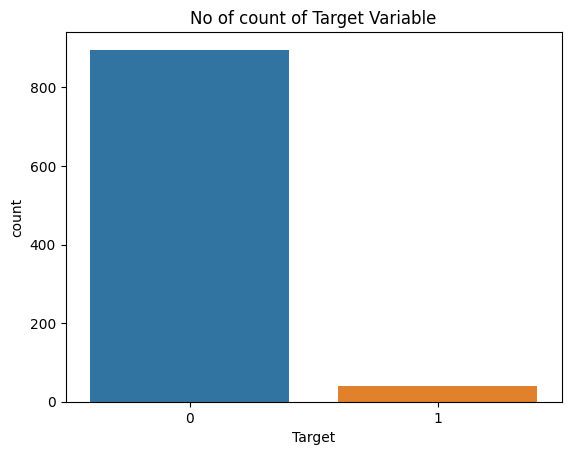

In [43]:
sns.countplot(x=df["Target"])
plt.title("No of count of Target Variable")
plt.show()

Aclass imbalance is happend
applying the smote analysis using the over sampling techniques to balance the data 

In [44]:
smote=SMOTE(sampling_strategy="auto",random_state=0)
X_train_s,y_train_s=smote.fit_resample(X_train,y_train)

In [45]:
#from sklearn.neighbors import KNeighborsClassifier
knn1=KNeighborsClassifier(n_neighbors=30,algorithm="ball_tree")
#from sklearn.neighbors import KNeighborsClassifier
knn2=KNeighborsClassifier(n_neighbors=10,algorithm="brute")

In [46]:
knn1.fit(X_train_s,y_train_s)
knn2.fit(X_train_s,y_train_s)

KNeighborsClassifier(algorithm='brute', n_neighbors=10)

In [47]:
knn1_y_pred=knn1.predict(X_test)
knn2_y_pred=knn2.predict(X_test)

In [48]:
knn2_y_pred

array([0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0], dtype=int64)

In [49]:
from sklearn.metrics import confusion_matrix,accuracy_score

cf_knn_1=confusion_matrix(y_test,knn1_y_pred)
cf_knn_2=confusion_matrix(y_test,knn2_y_pred)

In [50]:
cf_knn_1

array([[208,  61],
       [  2,  11]], dtype=int64)

In [51]:
cf_knn_1

array([[208,  61],
       [  2,  11]], dtype=int64)

In [52]:
accuracy_knn1=accuracy_score(y_test,knn1_y_pred)
accuracy_knn1

0.776595744680851

In [53]:
accuracy_knn2=accuracy_score(y_test,knn2_y_pred)
accuracy_knn2

0.8936170212765957

Decision tree alogorithem cannot solve the automatic class imbalance problem

In [54]:
#from sklearn.tree import DecisionTreeClassifier
dtc1=DecisionTreeClassifier(criterion="entropy",splitter="random")
dtc2=DecisionTreeClassifier()

In [55]:
dtc1.fit(X_train_s,y_train_s)
dtc2.fit(X_train_s,y_train_s)

DecisionTreeClassifier()

In [56]:
dtc1_y_pred=dtc1.predict(X_test)
dtc2_y_pred=dtc2.predict(X_test)

In [57]:
cf_dtc1=confusion_matrix(y_test,dtc1_y_pred)
cf_dtc1

array([[249,  20],
       [  3,  10]], dtype=int64)

In [58]:
cf_dtc2=confusion_matrix(y_test,dtc2_y_pred)
cf_dtc2

array([[260,   9],
       [  6,   7]], dtype=int64)

In [59]:
accuraccy_dtc1=accuracy_score(y_test,dtc1_y_pred)
accuraccy_dtc2=accuracy_score(y_test,dtc2_y_pred)
accuraccy_dtc1

0.9184397163120568

In [60]:
accuraccy_dtc2

0.9468085106382979

Applying random forest algorithem as it to does not solve the class imbalance problem

In [61]:
#from sklearn.ensemble import RandomForestClassifier
rfc_1=RandomForestClassifier(n_estimators=150,criterion="entropy")
rfc_2=RandomForestClassifier()

In [62]:
rfc_1.fit(X_train_s,y_train_s)
rfc_2.fit(X_train_s,y_train_s)

RandomForestClassifier()

In [63]:
rfc_1_y_pred=rfc_1.predict(X_test)
rfc_2_y_pred=rfc_2.predict(X_test)

In [64]:
cf_rfc_1=confusion_matrix(y_test,rfc_1_y_pred)
cf_rfc_2=confusion_matrix(y_test,rfc_2_y_pred)
cf_rfc_1

array([[264,   5],
       [  7,   6]], dtype=int64)

In [65]:
cf_rfc_2

array([[263,   6],
       [  7,   6]], dtype=int64)

In [66]:
accuraccy_rfc_1=accuracy_score(y_test,rfc_1_y_pred)
accuraccy_rfc_2=accuracy_score(y_test,rfc_2_y_pred)
accuraccy_rfc_1

0.9574468085106383

In [67]:
accuraccy_rfc_2

0.9539007092198581

In [72]:
data = {
    "Model": ["Logistic Regression (lr1)", "Logistic Regression (lr2)", "Logistic Regression (lr3)", 
              "Logistic Regression (lr4)", "KNN (knn1)", "KNN (knn2)", 
              "Decision Tree (dtc1)", "Decision Tree (dtc2)", 
              "Random Forest (rfc_1)", "Random Forest (rfc_2)"],
    
    "Hyperparameters": [
        {"penalty": "l2", "solver": "liblinear", "random_state": 0}, 
        {"penalty": "l2", "solver": "newton-cg", "random_state": 0}, 
        {"penalty": "l2", "solver": "newton-cholesky", "random_state": 0}, 
        {"penalty": "elasticnet", "solver": "saga", "l1_ratio": 0.5, "random_state": 0}, 
        {"n_neighbors": 30, "algorithm": "ball_tree"}, 
        {"n_neighbors": 10, "algorithm": "brute"}, 
        {"criterion": "entropy", "splitter": "random", "random_state": 0}, 
        {"criterion": "gini", "splitter": "best", "random_state": 0}, 
        {"n_estimators": 150, "criterion": "entropy", "random_state": 0}, 
        {"n_estimators": 100, "criterion": "gini", "random_state": 0}
    ],
    
    "Random State": [0] * 10,
    
    "Accuracy Score": [
        accuracy_lr1, accuracy_lr2, accuracy_lr3, accuracy_lr4, 
        accuracy_knn1, accuracy_knn2, 
        accuraccy_dtc1, accuraccy_dtc2, 
        accuraccy_rfc_1, accuraccy_rfc_2
    ],
    
    "SMOTE Used": ["No", "No", "No", "No", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes"]
}

# Convert to DataFrame
df_models = pd.DataFrame(data)


In [73]:
df_models

,Model,Hyperparameters,Random State,Accuracy Score,SMOTE Used
0,Logistic Regression (lr1),"{'penalty': 'l2', 'solver': 'liblinear', 'rand...",0,0.975177,No
1,Logistic Regression (lr2),"{'penalty': 'l2', 'solver': 'newton-cg', 'rand...",0,0.971631,No
2,Logistic Regression (lr3),"{'penalty': 'l2', 'solver': 'newton-cholesky',...",0,0.971631,No
3,Logistic Regression (lr4),"{'penalty': 'elasticnet', 'solver': 'saga', 'l...",0,0.968085,No
4,KNN (knn1),"{'n_neighbors': 30, 'algorithm': 'ball_tree'}",0,0.776596,Yes
5,KNN (knn2),"{'n_neighbors': 10, 'algorithm': 'brute'}",0,0.893617,Yes
6,Decision Tree (dtc1),"{'criterion': 'entropy', 'splitter': 'random',...",0,0.918440,Yes
7,Decision Tree (dtc2),"{'criterion': 'gini', 'splitter': 'best', 'ran...",0,0.946809,Yes
8,Random Forest (rfc_1),"{'n_estimators': 150, 'criterion': 'entropy', ...",0,0.957447,Yes
9,Random Forest (rfc_2),"{'n_estimators': 100, 'criterion': 'gini', 'ra...",0,0.953901,Yes
